<a href="https://colab.research.google.com/github/tiaracantiq/gitgithub/blob/main/Data_Analysis_(Data_Cleaning_%26_EDA)_pada_klasifikasi_data_Github_dan_ubah_kedalam_metode_K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
path = '/content/drive/MyDrive/Praktikum DASD2/Dataset/penguins.csv'
df = pd.read_csv(path)

df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
print("Nilai kosong per kolom:")
print(df.isnull().sum())

print("\nJumlah baris duplikat:")
print(df.duplicated().sum())


Nilai kosong per kolom:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Jumlah baris duplikat:
0


In [10]:
# Menghapus baris duplikat dari DataFrame
df = df.drop_duplicates()


In [11]:
df = df.dropna()

In [20]:
# Standarisasi nilai kategorikal (huruf kecil semua untuk kolom 'species')
df['species'] = df['species'].str.lower()

print("Missing values:\n", df.isnull().sum())
print("Data duplikat:", df.duplicated().sum())


Missing values:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
Data duplikat: 0


In [22]:
# Standarisasi nilai kategorikal (huruf kecil semua untuk kolom 'bill_length_mm')
df['bill_length_mm'] = df['bill_length_mm']

print("Missing values:\n", df.isnull().sum())
print("Data duplikat:", df.duplicated().sum())


Missing values:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
Data duplikat: 0


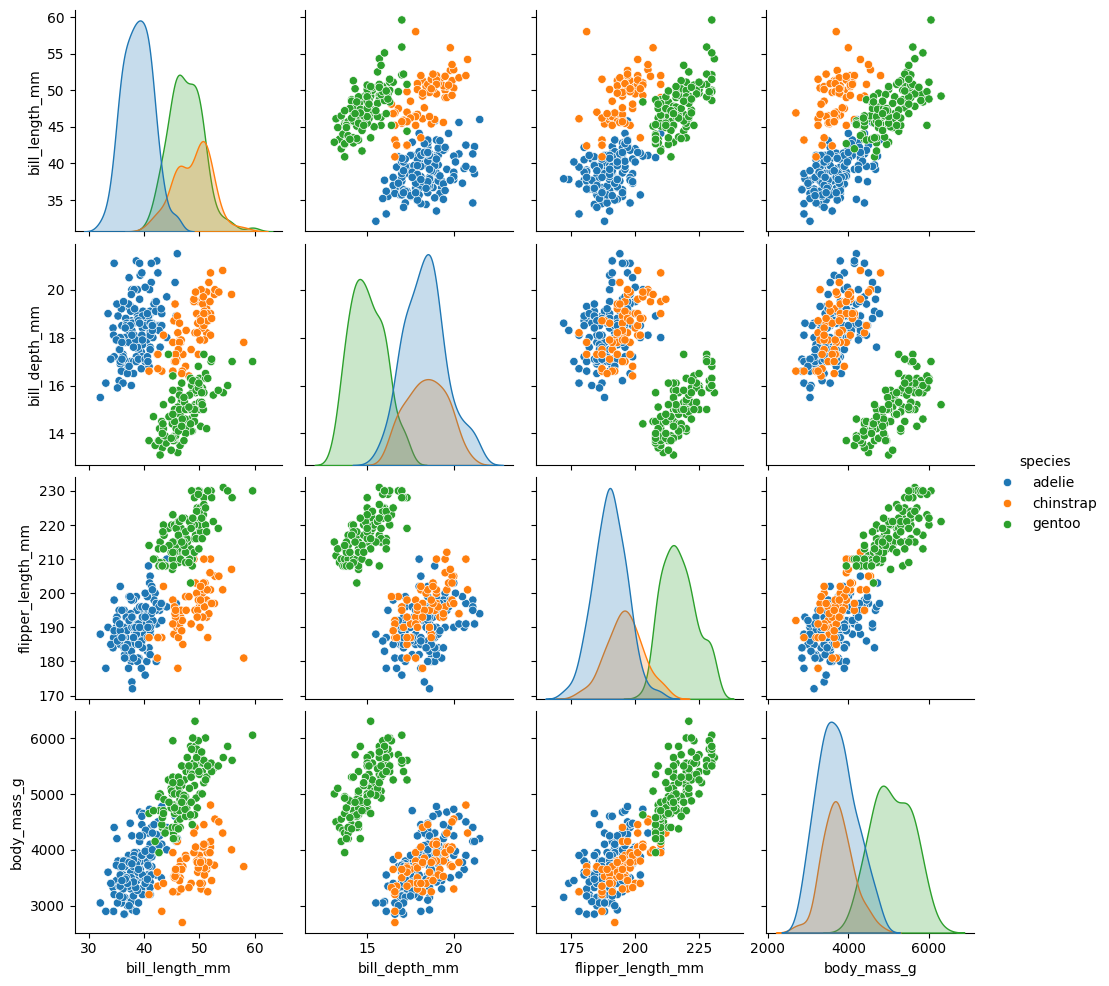

In [25]:
# Visualisasi hubungan antar fitur
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species')
plt.show()


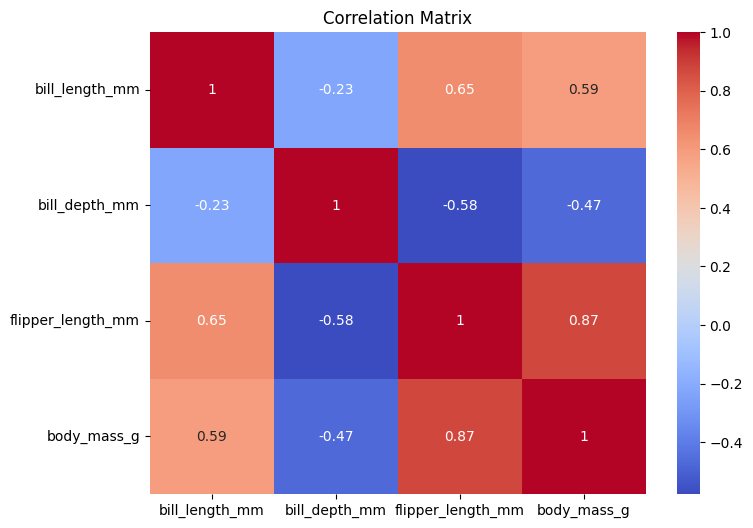

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


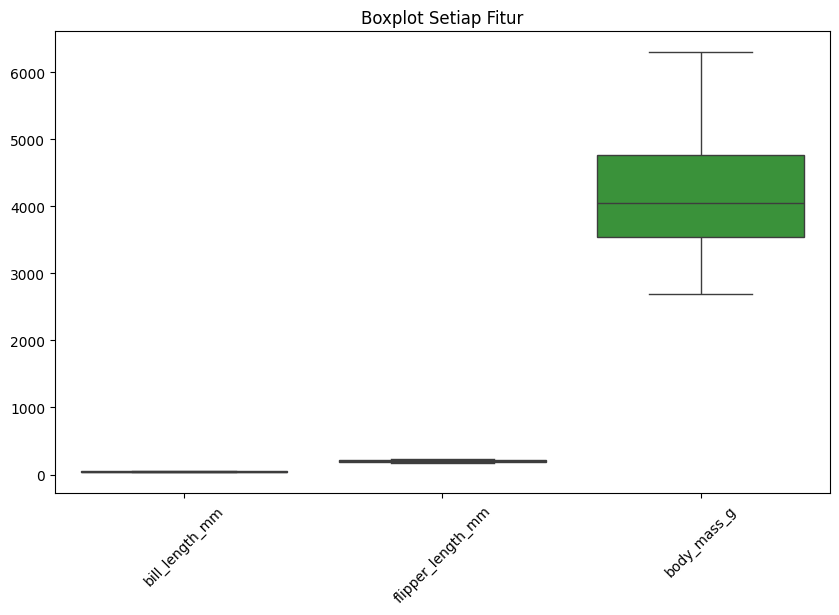

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['bill_depth_mm']))
plt.title("Boxplot Setiap Fitur")
plt.xticks(rotation=45)
plt.show()


In [29]:
# Menyimpan dataset yang telah dibersihkan ke file CSV
df.to_csv('penguins_cleaned.csv', index=False)


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [31]:
# Pastikan file penguins_cleaned.csv sudah disimpan sebelumnya
df = pd.read_csv('penguins_cleaned.csv')


In [32]:
# Fitur: panjang dan lebar paruh
X = df[['bill_length_mm', 'bill_depth_mm']]

# Target: jenis spesies
y = df['species']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
knn = KNeighborsClassifier(n_neighbors=5)  # K = 5 bisa disesuaikan
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [36]:
y_pred = knn.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[30  1  0]
 [ 0 12  1]
 [ 0  2 21]]

Classification Report:
              precision    recall  f1-score   support

      adelie       1.00      0.97      0.98        31
   chinstrap       0.80      0.92      0.86        13
      gentoo       0.95      0.91      0.93        23

    accuracy                           0.94        67
   macro avg       0.92      0.93      0.92        67
weighted avg       0.95      0.94      0.94        67



In [37]:
# Misalnya prediksi spesies penguin dengan panjang 45 mm dan lebar 17 mm
sample = [[45, 17]]
sample_scaled = scaler.transform(sample)
prediction = knn.predict(sample_scaled)
print("Prediksi spesies:", prediction[0])


Prediksi spesies: chinstrap


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
